# 1. Data loading

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

filename = 'FORCE_2020_train.csv' # nome do dado de entrada
df = pd.read_csv(filename) # leitura do dado de entrada

In [2]:
### number feature (well log profiling) visualization
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [3]:
# indata 
training_data = df[['WELL', 'DEPTH_MD','CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
                    'DTC', 'SP','FORCE_2020_LITHOFACIES_LITHOLOGY']].copy()

In [4]:
# indata to use 
df = df[['WELL', 'DEPTH_MD','CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
         'DTC', 'SP','FORCE_2020_LITHOFACIES_LITHOLOGY']].copy()

In [5]:
df.columns

Index(['WELL', 'DEPTH_MD', 'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'SP', 'FORCE_2020_LITHOFACIES_LITHOLOGY'],
      dtype='object')

In [6]:
# List the number of wells
for well in df['WELL'].unique():
    
    print(well)

15/9-13
15/9-15
15/9-17
16/1-2
16/1-6 A
16/10-1
16/10-2
16/10-3
16/10-5
16/11-1 ST3
16/2-11 A
16/2-16


In [7]:
# List of headers
plot_cols = ['WELL', 'DEPTH_MD','CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
             'DTC', 'SP','FORCE_2020_LITHOFACIES_LITHOLOGY']

In [8]:
df = df[plot_cols]

In [9]:
df.head()

,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,FORCE_2020_LITHOFACIES_LITHOLOGY
0,15/9-13,494.528,19.480835,1.611410,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,24.612379,65000
1,15/9-13,494.680,19.468800,1.618070,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,23.895531,65000
2,15/9-13,494.832,19.468800,1.626459,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,23.916357,65000
3,15/9-13,494.984,19.459282,1.621594,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,23.793688,65000
4,15/9-13,495.136,19.453100,1.602679,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,24.104078,65000


In [10]:
data_nan = df.copy()

In [11]:
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works

CALI 0
RMED 1
RDEP 2
RHOB 3
GR 4
NPHI 5
PEF 6
DTC 7
SP 8
FORCE_2020_LITHOFACIES_LITHOLOGY 9


In [12]:
data_nan.describe()

,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,FORCE_2020_LITHOFACIES_LITHOLOGY
count,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.0,133198.000000,133198.000000,133198.000000,133198.000000,133198.0
mean,1792.944663,0.998559,1.942627,2.944496,3.811221,5.0,5.688636,6.757068,7.995773,8.703314,10.0
std,739.441515,0.037939,0.232555,0.228962,0.391335,0.0,0.463053,0.428856,0.064876,0.456799,0.0
min,415.261599,0.000000,1.000000,2.000000,3.000000,5.0,5.000000,6.000000,7.000000,8.000000,10.0
25%,1182.822400,1.000000,2.000000,3.000000,4.000000,5.0,5.000000,7.000000,8.000000,8.000000,10.0
50%,1747.524495,1.000000,2.000000,3.000000,4.000000,5.0,6.000000,7.000000,8.000000,9.000000,10.0
75%,2413.874901,1.000000,2.000000,3.000000,4.000000,5.0,6.000000,7.000000,8.000000,9.000000,10.0
max,3272.024000,1.000000,2.000000,3.000000,4.000000,5.0,6.000000,7.000000,8.000000,9.000000,10.0


# 2. Plotting the Data with and without NaN

In [13]:
grouped = data_nan.groupby('WELL')

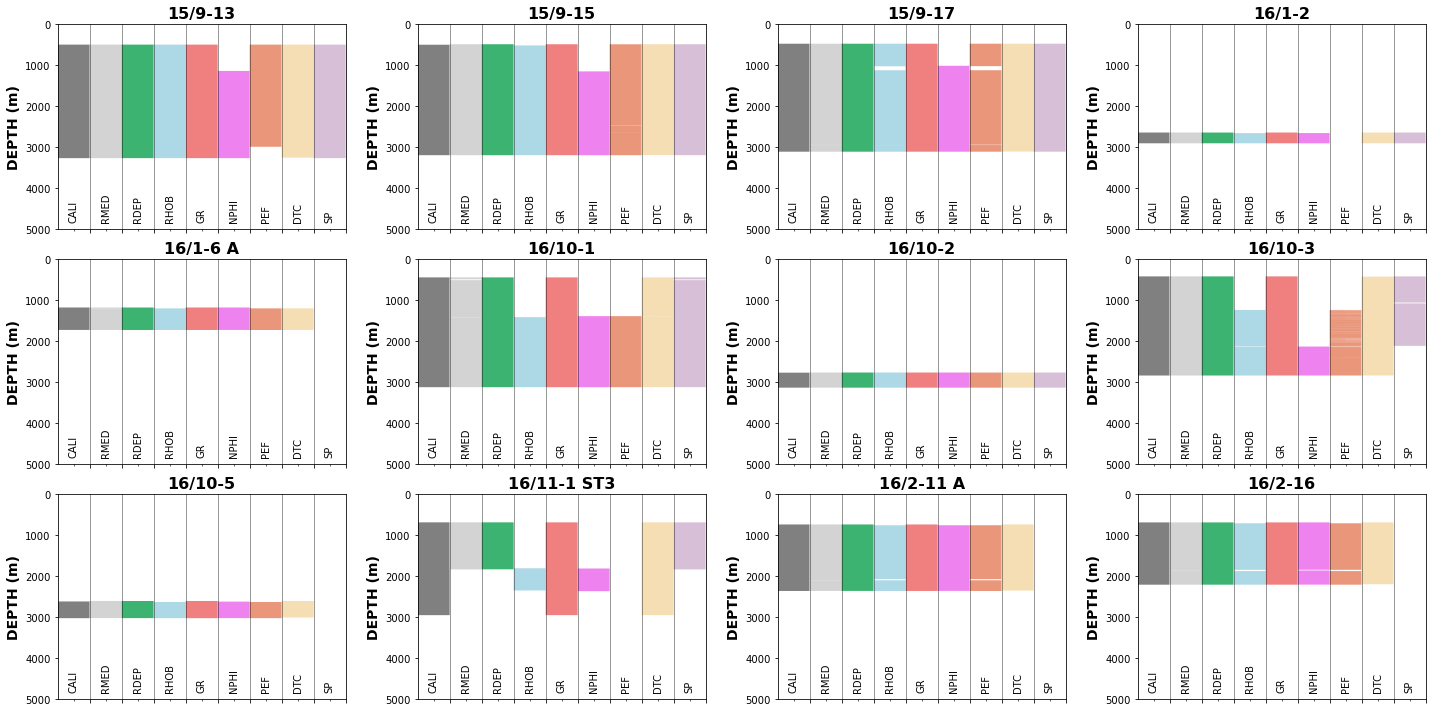

In [14]:
#Setup the labels we want to display on the x-axis
#labels = ['RMED','RDEP', 'RHOB','GR', 'NPHI', 'DTC'] # 6 features

#labels = ['CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF','DTC', 'SP','DTS','DRHO', 'RMIC','RXO'] # 13 features
labels = ['CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF','DTC', 'SP']


#Setup the figure and the subplots
fig, axs = plt.subplots(3, 4, figsize=(20,10))

#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    #ax.set_xlim(0,5) # 6 features
    ax.set_xlim(0,8) # 9 features
    
    #Setup the depth range
    ax.set_ylim(5000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor='grey')
    ax.fill_betweenx(df.DEPTH_MD, 1, df.RMED, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH_MD, 2, df.RDEP, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH_MD, 3, df.RHOB, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH_MD, 4, df.GR, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH_MD, 5, df.NPHI, facecolor='violet')
    ax.fill_betweenx(df.DEPTH_MD, 6, df.PEF, facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH_MD, 7, df.DTC, facecolor='wheat')
    ax.fill_betweenx(df.DEPTH_MD, 8, df.SP, facecolor='thistle')
  
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7,8,9], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5, 6.5, 7.5, 8.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-9)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')

plt.savefig('missingdata.png')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()


# 3. Select the headers to use in the in-data

In [15]:
training_data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [16]:
training_data

,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,FACIES
0,15/9-13,494.528000,19.480835,1.611410,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,24.612379,65000
1,15/9-13,494.680000,19.468800,1.618070,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,23.895531,65000
2,15/9-13,494.832000,19.468800,1.626459,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,23.916357,65000
3,15/9-13,494.984000,19.459282,1.621594,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,23.793688,65000
4,15/9-13,495.136000,19.453100,1.602679,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,24.104078,65000
...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,8.698007,5.382444,5.339929,2.531374,127.456139,NaN,3.607062,NaN,NaN,30000
133194,16/2-16,2207.462396,8.721210,5.651109,5.689734,2.526128,128.403305,NaN,3.609151,NaN,NaN,30000
133195,16/2-16,2207.614396,8.739136,5.870602,5.496074,2.528934,127.829262,NaN,3.594580,NaN,NaN,30000
133196,16/2-16,2207.766396,8.749738,5.756996,5.345353,2.527052,126.552277,NaN,3.534883,NaN,NaN,30000


# 4. Column Remapping / Renaming

In [17]:
lithology_numbers = {30000: 'Sandstone', # sandybrown
                     65030: 'Sandstone/Shale', #darkgoldenrod
                     65000: 'Shale', # olive
                     80000: 'Marl', #gainsboro
                     74000: 'Dolomite',
                     70000: 'Limestone',
                     70032: 'Chalk',
                     88000: 'Halite',
                     86000: 'Anhydrite',
                     99000: 'Tuff',
                     90000: 'Coal',
                     93000: 'Basement'}

second dictionary to tranform in integer

In [18]:
simple_lithology_numbers = {30000: 1,
                            65030: 2,
                            65000: 3,
                            80000: 4,
                            74000: 5,
                            70000: 6,
                            70032: 7,
                            88000: 8,
                            86000: 9,
                            99000: 10,
                            90000: 11,
                            93000: 12}

In [19]:
training_data['LITH'] = training_data['FACIES'].map(lithology_numbers)

In [20]:
training_data['LITH_SI'] = training_data['FACIES'].map(simple_lithology_numbers)

# 5. View the number of samples of the whole data

1     15794
2      6573
3     82390
4      4968
5       188
6     11912
7      5129
8      4314
9       374
10     1498
11       58
Name: LITH_SI, dtype: int64


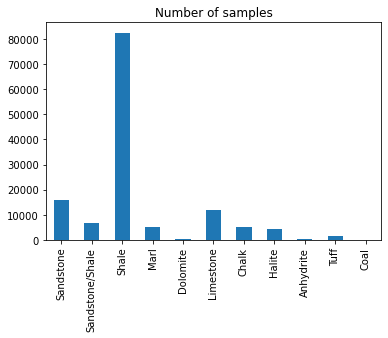

In [21]:
#plot the count of Facies
training_data['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(training_data['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,11,1)
plt.title('Number of samples')
plt.xticks(X_ind,['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Dolomite',
                  'Limestone',
                  'Chalk',
                  'Halite',
                  'Anhydrite',
                  'Tuff',
                  'Coal'])
plt.show()

# 6. Crossplot RHOB and NPHI (whole data)

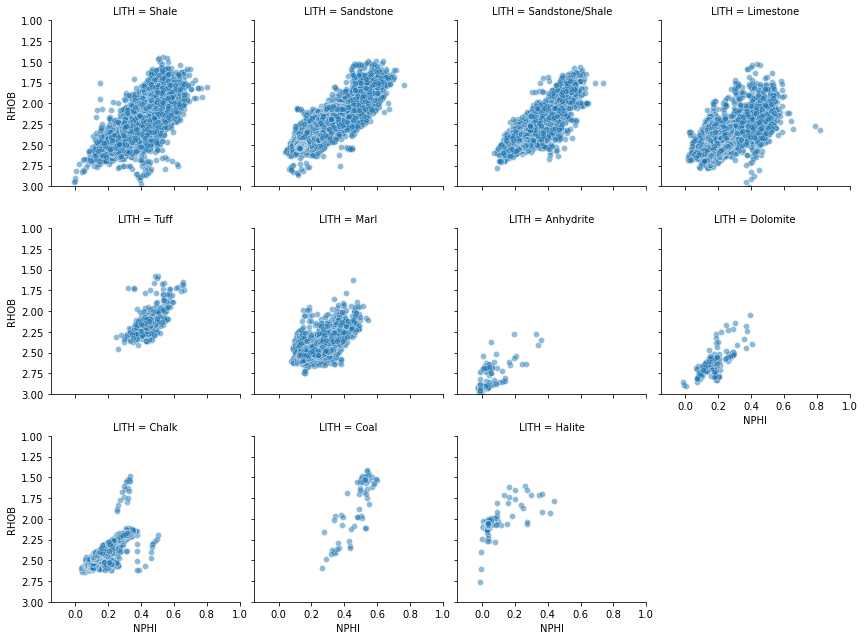

In [22]:
import seaborn as sns

g = sns.FacetGrid(training_data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
plt.show()

In [23]:
# remove NaN
training_data.dropna(inplace=True)

In [24]:
for well in training_data['WELL'].unique():
    
    print(well)

15/9-13
15/9-15
15/9-17
16/10-1
16/10-2


# 7. sorting out the blind test well

In [25]:
blind = training_data[training_data['WELL'] == '16/10-2'] #seleciona um poço apenas do dado
training_data = training_data[training_data['WELL'] != '16/10-2'] #remove o poço do dado
blind

,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,FACIES,LITH,LITH_SI
76392,16/10-2,2770.761202,8.734375,4.544452,4.423018,1.735440,17.944046,0.293669,76.950142,69.228119,100.200256,70032,Chalk,7
76393,16/10-2,2770.913202,8.734375,5.530590,4.398772,1.794672,15.844357,0.314103,66.581764,67.399734,100.412025,70032,Chalk,7
76394,16/10-2,2771.065202,8.734375,5.861920,4.407696,1.754729,15.693538,0.320146,46.594303,68.865883,100.765923,70032,Chalk,7
76395,16/10-2,2771.217202,8.734375,5.234766,4.482362,1.760929,16.752687,0.321471,44.719429,70.122185,100.719925,70000,Limestone,6
76396,16/10-2,2771.369202,8.734375,4.683754,4.466613,1.750807,16.261202,0.300296,52.933418,69.213905,100.176094,70000,Limestone,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78801,16/10-2,3136.929202,8.300969,1.127352,0.525568,2.330812,47.910629,0.268916,5.537608,84.500092,77.785538,30000,Sandstone,1
78802,16/10-2,3137.081202,8.296528,1.143420,0.518794,2.333778,47.535816,0.268218,5.597243,84.500275,79.850487,30000,Sandstone,1
78803,16/10-2,3137.233202,8.289069,1.139123,0.505787,2.312559,46.608562,0.264366,5.707129,84.656967,81.314255,30000,Sandstone,1
78804,16/10-2,3137.385202,8.293102,1.095444,0.491440,2.274340,48.267384,0.266614,5.601539,85.371315,81.153702,30000,Sandstone,1


In [26]:
training_data['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/10-1'], dtype=object)

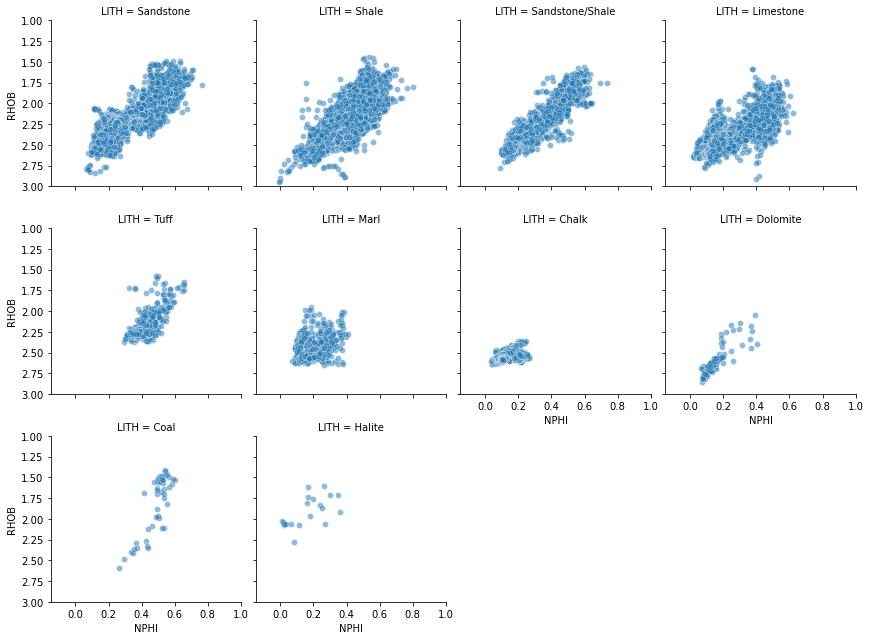

In [27]:
import seaborn as sns

g = sns.FacetGrid(training_data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
plt.show()

Two lithofacoes are exluded from data after dropping NaN.

1    958
2    760
3    380
4    189
6    112
7     13
Name: LITH_SI, dtype: int64


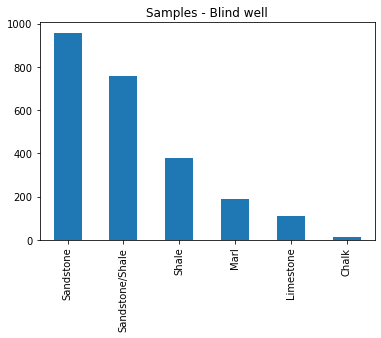

In [28]:
#plot the count of Facies
blind['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(blind['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,6,1)
plt.title('Samples - Blind well')
plt.xticks(X_ind,['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Limestone',
                  'Chalk'])
plt.show()

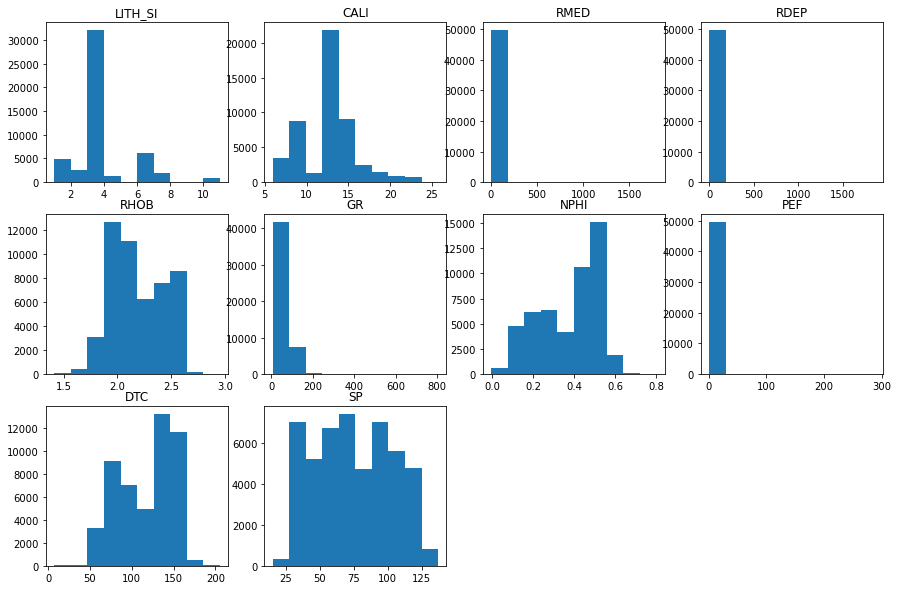

In [29]:
#['WELL', 'DEPTH_MD', 'RDEP', 'RHOB','GR', 'NPHI', 'PEF', 'DTC','SP']
#col_list = ['LITH_SI','RDEP', 'RHOB','GR', 'NPHI', 'PEF', 'DTC','SP']

col_list = ['LITH_SI','CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF','DTC', 'SP']



plt.figure(figsize=(15,10))
i=0
for col in col_list:
    i+=1
    plt.subplot(3,4,i)
    plt.hist(training_data[col])
    plt.title(col)
plt.show()

1      4879
2      2578
3     32105
4      1323
5        98
6      6118
7      1928
8        20
10      719
11       47
Name: LITH_SI, dtype: int64


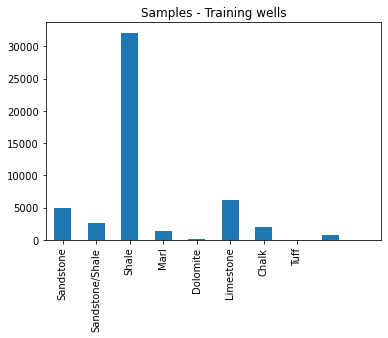

In [30]:
#plot the count of Facies
training_data['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(training_data['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,8,1)
plt.title('Samples - Training wells')
plt.xticks(X_ind,['Sandstone','Sandstone/Shale','Shale','Marl','Dolomite','Limestone','Chalk','Tuff'])
plt.show()

# 8. Prepare data for modeling and blind test well


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report

In [32]:
features = ['CALI','RMED','RDEP','RHOB','GR','NPHI','PEF','DTC','SP']



y = training_data['LITH_SI']
X = training_data[features]

In [33]:
### Data for modelling

scaler = StandardScaler().fit(X)
X_stnd = scaler.transform(X)

# standarization of data for SVM
X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state=42)

In [34]:
### Blind test well

y_blind = blind['LITH_SI']
X_blind = blind[features]
X_blind_stnd = scaler.transform(X_blind)

# 9. Parameter optimization and classifier training

Modeling algorithms:
1. SVM
2. Gradient boosting
3. Random forest
4. KNN

In [35]:
from sklearn.svm import SVC # To use Support Vector Machine
from sklearn import ensemble # To use Gradient Boosting and Random forest
from sklearn.neighbors import KNeighborsClassifier # To use KNN


### 9.1 SVM: Parameter optimiztion

In [ ]:


c_list = [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000]
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# plt.figure(figsize=(15,10))
# class parameterOptimizationSvm():
#     def __init__(self, cList = list(), gammaList = list()):
#         self.cList = cList
#         self.gammaList = gammaList
    
#     def run(self):              
from tqdm.notebook import tqdm_notebook
import time
for i in tqdm_notebook(range(10), desc = 'Progress using tqdm_notebook()'):
    time.sleep(0.5)
    for gamma_value in gamma_list:
        scores = list()
        score_stds = list()
        score_tests = list()
        for c_value in c_list:  
            clf_cv = SVC(C=c_value, gamma=gamma_value)
            cv_score = cross_val_score(clf_cv, X_train, y_train)
            scores.append(np.mean(cv_score))
            score_stds.append(np.std(cv_score))
            clf_cv.fit(X_train, y_train)
        
            score_test = clf_cv.score(X_test, y_test)
            score_tests.append(score_test)
    
        plt.subplot(2,3,i)
        plt.semilogx(c_list, scores, label='Train error')
        plt.semilogx(c_list, score_tests, label='Cross-validation error')
        #plt.semilogx(c_list, np.array(scores)+np.array(score_stds), 'b--')
        #plt.semilogx(c_list, np.array(scores)+-np.array(score_stds), 'b--')
        plt.title('Gamma = {}'.format(gamma_value))
        plt.xlabel('C values')
        plt.ylabel('Accuracy')
        plt.ylim(0,1.1)

    plt.show()

Progress using tqdm_notebook():   0%|          | 0/10 [00:00<?, ?it/s]

SVM classifier training

In [36]:
clf = SVC(C=10, gamma=1)
clf.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [37]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    

    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

1    958
2    760
3    380
4    189
6    112
7     13
Name: LITH_SI, dtype: int64


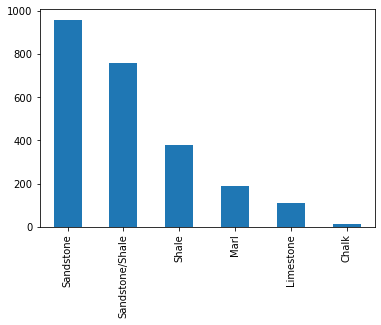

In [41]:
#plot the count of Facies
blind['LITH_SI'].value_counts().sort_index().plot(kind='bar')
print(blind['LITH_SI'].value_counts().sort_index())
X_ind = np.arange(0,6,1)
plt.xticks(X_ind,['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Limestone',
                  'Chalk'])


plt.show()

                 precision    recall  f1-score   support

      Sandstone       0.91      0.90      0.91      1449
Sandstone/Shale       0.77      0.78      0.78       748
          Shale       0.96      0.98      0.97      9671
           Marl       0.90      0.85      0.87       397
       Dolomite       0.80      0.71      0.75        28
      Limestone       0.92      0.87      0.90      1829
          Chalk       0.91      0.87      0.89       576
         Halite       1.00      0.80      0.89         5
           Tuff       0.84      0.69      0.76       229
           Coal       0.83      0.38      0.53        13

       accuracy                           0.94     14945
      macro avg       0.88      0.78      0.82     14945
   weighted avg       0.94      0.94      0.94     14945

Normalized confusion matrix


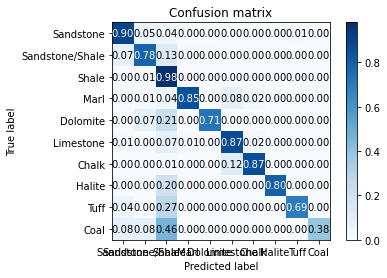

In [42]:
target_list = ['Sandstone',
               'Sandstone/Shale',
               'Shale',
               'Marl',
               'Dolomite',
               'Limestone',
               'Chalk',
               'Halite',
               'Tuff',
               'Coal']
pred_test = clf.predict(X_test)
print(classification_report(y_test, pred_test, target_names=target_list))
cm_test_SVM = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm_test_SVM, target_list, normalize=True)

                 precision    recall  f1-score   support

      Sandstone       0.61      0.61      0.61       958
Sandstone/Shale       0.73      0.31      0.43       760
          Shale       0.57      0.93      0.71       380
           Marl       0.13      0.23      0.17       189
      Limestone       0.19      0.31      0.24       112
          Chalk       0.00      0.00      0.00        13

       accuracy                           0.52      2412
      macro avg       0.37      0.40      0.36      2412
   weighted avg       0.58      0.52      0.52      2412

Normalized confusion matrix


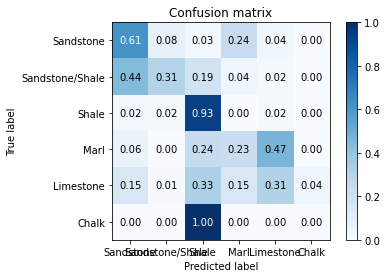

In [43]:
target_list = ['Sandstone',
               'Sandstone/Shale',
               'Shale',
               'Marl',
               'Limestone',
               'Chalk']
pred_blind = clf.predict(X_blind_stnd)
print(classification_report(y_blind, pred_blind, target_names=target_list))
cm_SVM = confusion_matrix(y_blind, pred_blind)
plot_confusion_matrix(cm_SVM, target_list, normalize=True)

### 9.2 Gradient boosting (GB): Parameter optimiztion

In [44]:
# why do not fit and transform  GRADIENT BOOST
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
loss_list = ['deviance']
max_depths = [2,3,4]

i = 0
plt.figure(figsize=(15,5))


for los in loss_list:
    
    i = i + 1
    scores = list()
    score_tests = list()

    for depth in max_depths:
        
        params = {'loss': los, ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
                  'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
                  'n_estimators': 500, ##  number of iterations, int, default=100
                  'max_depth': depth, ##  int, default=3
                  'subsample': 1, ## float, default=1.0
                  'min_samples_split': 2 ## int or float, default=2
                 }
        clf_cv = ensemble.GradientBoostingClassifier(**params)
        
        # Train data
        clf_cv.fit(X1_train, y1_train)
        cv_score = clf_cv.score(X1_train, y1_train)
        scores.append(np.mean(cv_score))
        
        # Test data
        score_test = clf_cv.score(X1_test, y1_test)
        score_tests.append(score_test)
    
    plt.subplot(1,2,i)
    plt.plot(max_depths, scores, 'o-', color='b', label='Train')
    plt.plot(max_depths, score_tests, 'o-', color='r', label='Test')
    plt.legend()
    plt.title('Loss = {}'.format(los))
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    
    
    #ax.semilogx(C_range, cv_errors, label='CV error')
    #ax.semilogx(C_range, train_errors, label='Train error')
    
    plt.ylim(0,1.1)

plt.show()

How you could see, there is convergen with 3 deepths

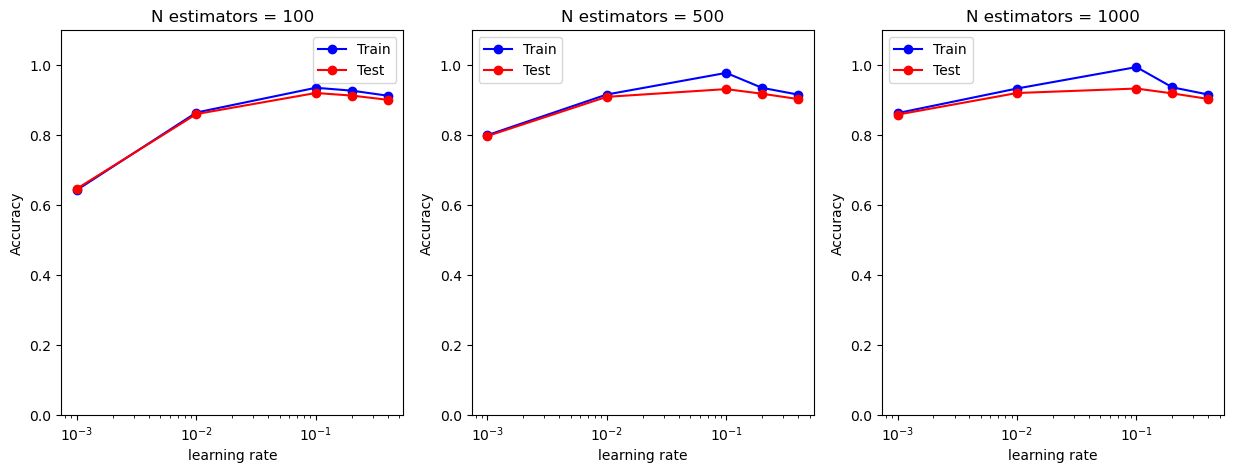

In [56]:
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.4]
n_estimators_list = [100, 500, 1000]

i = 0
plt.figure(figsize=(15,5))

for est in n_estimators_list:
    i = i + 1
    scores = list()
    score_tests = list()
    
    for rate in learning_rates:
        params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
                  'learning_rate': rate, ##  learning_ratefloat, default=0.1
                  'n_estimators': est, ##  number of iterations, int, default=100
                  'max_depth': 3, ##  int, default=3
                  'subsample': 1, ## float, default=1.0
                  'min_samples_split': 2 ## int or float, default=2
                  }
        clf_cv = ensemble.GradientBoostingClassifier(**params)
        clf_cv.fit(X1_train, y1_train)
        cv_score = clf_cv.score(X1_train, y1_train)
        scores.append(np.mean(cv_score))
        score_test = clf_cv.score(X1_test, y1_test)
        score_tests.append(score_test)
        
    plt.subplot(1,3,i)
    plt.semilogx(learning_rates, scores, 'o-', color='b', label='Train')
    plt.semilogx(learning_rates, score_tests, 'o-', color='r', label='Test')
    plt.legend()
    plt.title('N estimators = {}'.format(est))
    plt.xlabel('learning rate')
    plt.ylabel('Accuracy')
    plt.ylim(0,1.1)

plt.show()

N_estimators =500 and learning rate = 0.1

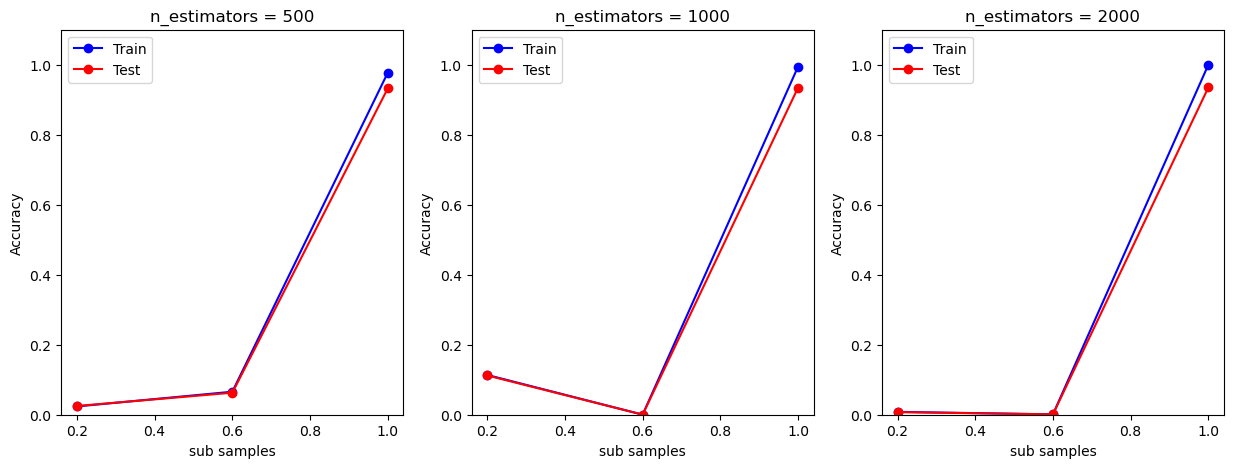

In [57]:
subsamples = [0.2, 0.6, 1]
n_estimators_list = [500, 1000, 2000]

i = 0
plt.figure(figsize=(15,5))

for est in n_estimators_list:
    
    i = i + 1
    scores = list()
    score_tests = list()
    
    for sub in subsamples:
        
        params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
                  'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
                  'n_estimators': est, ##  number of iterations, int, default=100
                  'max_depth': 3, ##  int, default=3
                  'subsample': sub, ## float, default=1.0
                  'min_samples_split': 2 ## int or float, default=2
                  }
        
        clf_cv = ensemble.GradientBoostingClassifier(**params)
        clf_cv.fit(X_train, y_train)
        cv_score = clf_cv.score(X_train, y_train)
        
        scores.append(np.mean(cv_score))
        score_test = clf_cv.score(X_test, y_test)
        score_tests.append(score_test)
        
        
    plt.subplot(1,3,i)
    plt.plot(subsamples, scores, 'o-', color='b', label='Train')
    plt.plot(subsamples, score_tests, 'o-', color='r', label='Test')
    plt.legend()
    plt.title('n_estimators = {}'.format(est))
    plt.xlabel('sub samples')
    plt.ylabel('Accuracy')
    plt.ylim(0,1.1)

plt.show()

Based on the accuracy plot, max_depth=3, learning_rate=0.1, n_estimators=500, subsample=1.0

Gradient Boosting classifier training

In [42]:
params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
          'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
          'n_estimators': 500, ##  number of iterations, int, default=100
          'max_depth': 3, ##  int, default=3
          'subsample': 1.0, ## float, default=1.0
          'min_samples_split': 2 ## int or float, default=2
          }
clf_GB = ensemble.GradientBoostingClassifier(**params)
print(cross_val_score(clf_GB, X1_train, y1_train, cv=5))

[0.92213937 0.92572412 0.92758818 0.92859191 0.91984514]


              precision    recall  f1-score   support

           1       0.90      0.90      0.90      1449
           2       0.77      0.72      0.74       748
           3       0.96      0.98      0.97      9671
           4       0.86      0.84      0.85       397
           5       0.70      0.50      0.58        28
           6       0.91      0.87      0.89      1829
           7       0.91      0.90      0.90       576
           8       1.00      0.80      0.89         5
          10       0.80      0.65      0.71       229
          11       0.83      0.77      0.80        13

    accuracy                           0.93     14945
   macro avg       0.86      0.79      0.82     14945
weighted avg       0.93      0.93      0.93     14945

Normalized confusion matrix


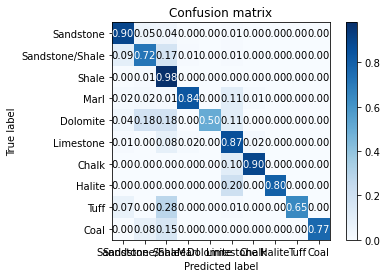

In [46]:
target_list_gb = ['Sandstone',
                  'Sandstone/Shale',
                  'Shale',
                  'Marl',
                  'Dolomite',
                  'Limestone',
                  'Chalk',
                  'Halite',
                  'Tuff',
                  'Coal']

params = {'loss': 'deviance', ##  loss{‘deviance’, ‘exponential’}, default=’deviance’
          'learning_rate': 0.1, ##  learning_ratefloat, default=0.1
          'n_estimators': 500, ##  number of iterations, int, default=100
          'max_depth': 3, ##  int, default=3
          'subsample': 1.0, ## float, default=1.0
          'min_samples_split': 2 ## int or float, default=2
          }
clf_GB = ensemble.GradientBoostingClassifier(**params)
clf_GB.fit(X1_train, y1_train)
preds_GB = clf_GB.predict(X1_test)

print(classification_report(y1_test, preds_GB))
cm_test_GB = confusion_matrix(y1_test, preds_GB)
plot_confusion_matrix(cm_test_GB, target_list_gb, normalize=True)

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\COMETL~1\AppData\Local\Temp/ipykernel_13240/25050

                 precision    recall  f1-score   support

      Sandstone       0.77      0.88      0.82       958
Sandstone/Shale       0.88      0.23      0.37       760
          Shale       0.49      0.94      0.64       380
           Marl       0.25      0.22      0.23       189
       Dolomite       0.00      0.00      0.00         0
      Limestone       0.32      0.57      0.41       112
          Chalk       0.00      0.00      0.00        13
         Halite       0.00      0.00      0.00         0
           Tuff       0.00      0.00      0.00         0

       accuracy                           0.61      2412
      macro avg       0.30      0.32      0.27      2412
   weighted avg       0.69      0.61      0.58      2412

Normalized confusion matrix


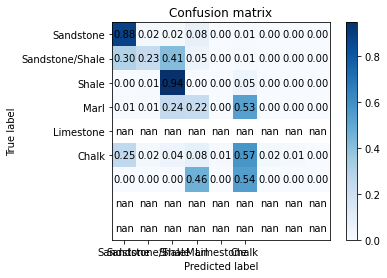

In [61]:
targe_list_rf=['Sandstone','Sandstone/Shale','Shale','Marl','Dolomite','Limestone','Chalk','Halite','Tuff']

pred_GB_blind = clf_GB.predict(X_blind)
print(classification_report(y_blind, pred_GB_blind, target_names= targe_list_rf))



cm_GB = confusion_matrix(y_blind, pred_GB_blind)
plot_confusion_matrix(cm_GB, target_list, normalize=True)

### 9.3. Random forest (RF) parameter optimization

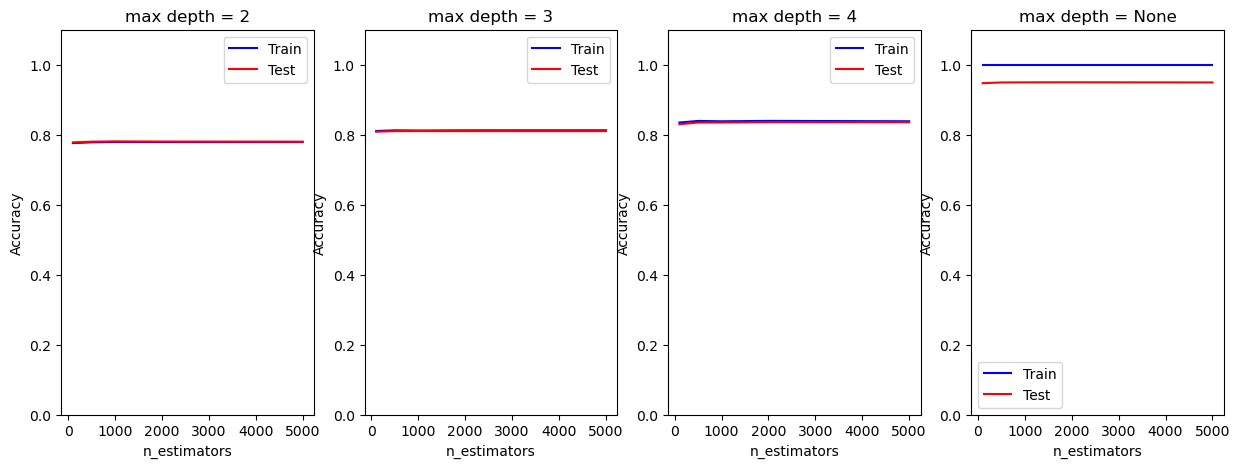

In [65]:
max_depths = [2, 3, 4]
n_estimators_list = [100, 500, 1000, 2000, 5000]

i = 0
plt.figure(figsize=(15,5))

for depth in max_depths:
    
    i = i + 1
    scores = list()
    score_tests = list()
    
    for est in n_estimators_list:
        params = {'n_estimators': est, ##  number of iterations, int, default=100
                  'max_depth': depth, ##  int, default=None
                  'n_jobs': -1 #to speed up computations by taking advantage of parallel processing.
                  
                  }
        clf_cv = ensemble.RandomForestClassifier(**params)
        clf_cv.fit(X1_train, y1_train)
        cv_score = clf_cv.score(X1_train, y1_train)
        scores.append(np.mean(cv_score))
        score_test = clf_cv.score(X1_test, y1_test)
        score_tests.append(score_test)
        
    plt.subplot(1,4,i)
    plt.plot(n_estimators_list, scores, color='b', label='Train')
    plt.plot(n_estimators_list, score_tests, color='r', label='Test')
    plt.legend()
    plt.title('max depth = {}'.format(depth))
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.ylim(0,1.1)

scores = list()
score_tests = list()

for est in n_estimators_list:
    
    clf_cv = ensemble.RandomForestClassifier(n_estimators=est)
    clf_cv.fit(X1_train, y1_train)
    cv_score = clf_cv.score(X1_train, y1_train)
    scores.append(np.mean(cv_score))
    score_test = clf_cv.score(X1_test, y1_test)
    score_tests.append(score_test)
    
plt.subplot(1,4,4)
plt.plot(n_estimators_list, scores, color='b', label='Train')
plt.plot(n_estimators_list, score_tests, color='r', label='Test')
plt.legend()
plt.title('max depth = {}'.format('None'))
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.show()

Max_depth can be default (None), and n_estimator = 2000 gives best accuracy.

Random forest classifier training

[0.93504445 0.94350445 0.94178377 0.94522512 0.94178377]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      1449
           2       0.83      0.80      0.82       748
           3       0.96      0.99      0.97      9671
           4       0.90      0.91      0.90       397
           5       0.95      0.71      0.82        28
           6       0.96      0.88      0.92      1829
           7       0.94      0.93      0.94       576
           8       1.00      1.00      1.00         5
          10       0.92      0.63      0.75       229
          11       0.92      0.85      0.88        13

    accuracy                           0.95     14945
   macro avg       0.93      0.86      0.89     14945
weighted avg       0.95      0.95      0.95     14945

Normalized confusion matrix


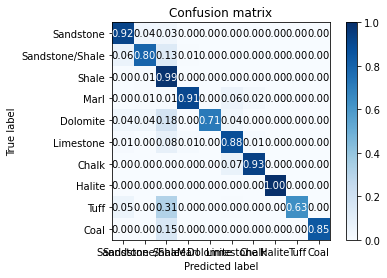

In [57]:
clf_RF = ensemble.RandomForestClassifier(n_estimators=2000, criterion='gini')
print(cross_val_score(clf_RF, X1_train, y1_train, cv=5))
clf_RF.fit(X1_train, y1_train)
preds_RF = clf_RF.predict(X1_test)
print(classification_report(y1_test, preds_RF))
cm_test_RF = confusion_matrix(y1_test, preds_RF)
plot_confusion_matrix(cm_test_RF, target_list_gb, normalize=True)

Random forest blind predction

              precision    recall  f1-score   support

           1       0.82      0.89      0.85       958
           2       0.82      0.45      0.58       760
           3       0.54      0.93      0.68       380
           4       0.49      0.25      0.33       189
           6       0.36      0.64      0.46       112
           7       0.00      0.00      0.00        13

    accuracy                           0.69      2412
   macro avg       0.51      0.53      0.49      2412
weighted avg       0.72      0.69      0.68      2412

Normalized confusion matrix


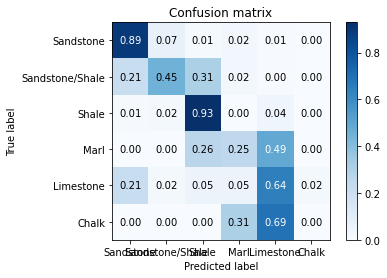

In [62]:
preds_RF_blind = clf_RF.predict(X_blind)
print(classification_report(y_blind, preds_RF_blind))
cm_RF = confusion_matrix(y_blind, preds_RF_blind)
plot_confusion_matrix(cm_RF, target_list, normalize=True)

### 9.4. KNN Parameter optimzation

[0.9558646400917694]
[0.9558646400917694, 0.9554631488385431]
[0.9558646400917694, 0.9554631488385431, 0.9456839690278176]
[0.9558646400917694, 0.9554631488385431, 0.9456839690278176, 0.9436191568683682]
[1.0]
[1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]


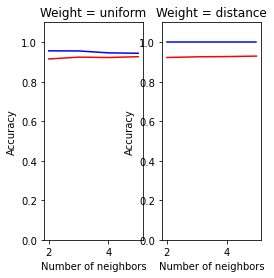

In [74]:
neighbor_list = [2,3,4,5]
weight_list = ['uniform', 'distance']
i=0

for weight in weight_list:
    
    
    scores = list()
    score_tests = list()
    i = i + 1
    
    for neighbor in neighbor_list:
        clf_cv = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
        clf_cv.fit(X1_train, y1_train)
        scores.append(clf_cv.score(X1_train, y1_train))
        score_tests.append(clf_cv.score(X1_test, y1_test))
        print(scores)
        
    plt.subplot(1,3,i)
    plt.plot(neighbor_list, scores, 'b')
    plt.plot(neighbor_list, score_tests, 'r')
    plt.title('Weight = {}'.format(weight))
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.ylim(0,1.1)
plt.show()

Using weight has a better KNN modeling score.

KNN classifer training

In [63]:
clf_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
print(cross_val_score(clf_knn, X1_train, y1_train, cv=5))

[0.91683395 0.92472039 0.92299971 0.92056209 0.91697734]


              precision    recall  f1-score   support

           1       0.87      0.88      0.88      1449
           2       0.75      0.73      0.74       748
           3       0.96      0.98      0.97      9671
           4       0.84      0.88      0.86       397
           5       0.74      0.61      0.67        28
           6       0.92      0.86      0.89      1829
           7       0.92      0.87      0.89       576
           8       0.80      0.80      0.80         5
          10       0.81      0.57      0.67       229
          11       0.75      0.69      0.72        13

    accuracy                           0.93     14945
   macro avg       0.84      0.79      0.81     14945
weighted avg       0.93      0.93      0.93     14945

Normalized confusion matrix


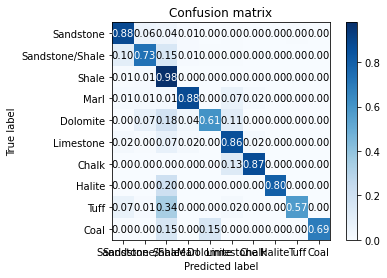

In [64]:
clf_knn = KNeighborsClassifier(weights='distance')
clf_knn.fit(X1_train, y1_train)
preds_knn = clf_knn.predict(X1_test)
print(classification_report(y1_test, preds_knn))
cm_test_knn = confusion_matrix(y1_test, preds_knn)
plot_confusion_matrix(cm_test_knn, target_list_gb, normalize=True)

KNN blind well prediction

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\COMETL~1\AppData\Local\Temp/ipykernel_13240/25050

              precision    recall  f1-score   support

           1       0.55      0.27      0.36       958
           2       0.69      0.46      0.56       760
           3       0.51      0.84      0.63       380
           4       0.05      0.04      0.04       189
           6       0.06      0.34      0.11       112
           7       0.25      1.00      0.39        13
          10       0.00      0.00      0.00         0

    accuracy                           0.41      2412
   macro avg       0.30      0.42      0.30      2412
weighted avg       0.53      0.41      0.43      2412

Normalized confusion matrix


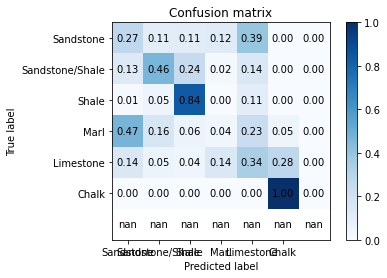

In [65]:
preds_knn_blind = clf_knn.predict(X_blind)
print(classification_report(y_blind, preds_knn_blind))
cm_knn = confusion_matrix(y_blind, preds_knn_blind)
plot_confusion_matrix(cm_knn, target_list, normalize=True)

# 10. Model performance evaluation

I will use the diagnosis of confusion matrix from train data set to evaluate the model performance. The diagnosis of confusion matrix points how much percentage of the stone is correctly predicted.

In [66]:
### To create a data frame recording the correct prediction (normalized) of 
### facies for each machine learning algorithm

mod_test_list = ['SVM', 'GB', 'RF','KNN']
cm_test_list = [cm_test_SVM, cm_test_GB, cm_test_RF, cm_test_knn]
face_test_list = ['Sandstone','Sandstone/Shale','Shale','Marl','Limestone','Chalk']
pred_test_df = pd.DataFrame(index=target_list, columns=mod_test_list)

for mod in mod_test_list:
    
    col_index = int(mod_test_list.index(mod))
    cm = cm_test_list[col_index]
    
    for face in face_test_list:
        row_index = target_list.index(face)
        #print(face, row_index, col_index)
        pred_test_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])
        

### add the accuracy factor
df_1 = pd.DataFrame([[0.94, 0.93, 0.95, 0.93]], index=['Accuracy'], columns=mod_test_list)    
pred_test_df = pred_test_df.append(df_1)

print(pred_test_df.head(10))

                      SVM        GB        RF       KNN
Sandstone        0.900621    0.8951  0.921325  0.883368
Sandstone/Shale  0.782086  0.716578  0.798128  0.731283
Shale            0.981077   0.98056  0.987695   0.97932
Marl             0.851385  0.838791   0.90932  0.879093
Limestone        0.714286       0.5  0.714286  0.607143
Chalk            0.874248    0.8655  0.884636  0.863313
Accuracy             0.94      0.93      0.95      0.93


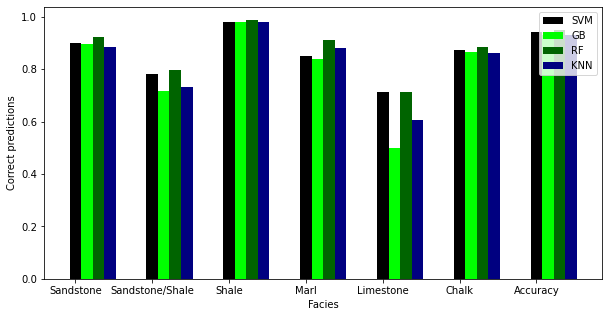

In [67]:
X_ind = np.arange(pred_test_df.shape[0])
(pred_df_index_list) = ['Sandstone','Sandstone/Shale','Shale','Marl','Limestone','Chalk', 'Accuracy']
plt.figure(figsize=(10,5))
plt.bar(X_ind, pred_test_df['SVM'], color='k', width=0.15)
plt.bar(X_ind+0.15, pred_test_df['GB'], color='lime', width=0.15)
plt.bar(X_ind+0.3, pred_test_df['RF'], color='darkgreen', width=0.15)
plt.bar(X_ind+0.45, pred_test_df['KNN'], color='navy', width=0.15)
plt.xticks(X_ind, pred_df_index_list)
plt.xlabel('Facies')
plt.ylabel('Correct predictions')
plt.legend(labels=mod_test_list)
plt.show()

# 11. Calssifier evluation using blind test well

I will use the same method shown in item4 for evaluation.

In [68]:
### To create a data frame recording the correct prediction (normalized) of facies of blind test well for each machine learning algorithm

mod_list = ['SVM', 'GB', 'RF','KNN']
cm_list = [cm_SVM, cm_GB, cm_RF, cm_knn]
face_list = ['Sandstone','Sandstone/Shale','Shale','Marl','Limestone','Chalk']
pred_df = pd.DataFrame(index=target_list, columns=mod_list)

for mod in mod_list:
    col_index = int(mod_list.index(mod))
    cm = cm_list[col_index]
    
    for face in face_list:
        
        row_index = target_list.index(face)
        #print(face, row_index, col_index)
        pred_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])


print(pred_df.head(10))

                      SVM        GB        RF       KNN
Sandstone        0.612735  0.879958  0.892484  0.268267
Sandstone/Shale  0.307895  0.230263  0.451316  0.464474
Shale            0.934211  0.944737  0.928947  0.836842
Marl             0.227513  0.222222  0.248677  0.037037
Limestone          0.3125       NaN  0.642857  0.339286
Chalk                 0.0  0.571429       0.0       1.0


C:\Users\COMETL~1\AppData\Local\Temp/ipykernel_13240/4173485467.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  pred_df.iloc[row_index, col_index] = cm[row_index][row_index]/sum(cm[row_index])


In [69]:
### add the accuracy factor and percentage of most correct prediction
df_1 = pd.DataFrame([[0.52, 0.62, 0.69, 0.41],[0.47,0.57,0.63,0.39]], index=['Accuracy','prec'], columns=mod_list)    
pred_df = pred_df.append(df_1)
pred_df.head(13)

,SVM,GB,RF,KNN
Sandstone,0.612735,0.879958,0.892484,0.268267
Sandstone/Shale,0.307895,0.230263,0.451316,0.464474
Shale,0.934211,0.944737,0.928947,0.836842
Marl,0.227513,0.222222,0.248677,0.037037
Limestone,0.3125,NaN,0.642857,0.339286
Chalk,0.0,0.571429,0.0,1.0
Accuracy,0.52,0.62,0.69,0.41
prec,0.47,0.57,0.63,0.39


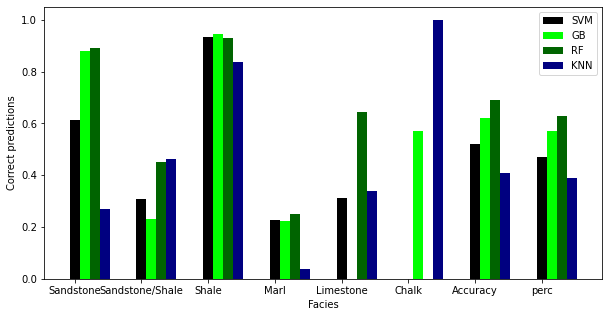

In [70]:
X_ind = np.arange(pred_df.shape[0])
(pred_df_index_list) = ['Sandstone','Sandstone/Shale','Shale','Marl','Limestone','Chalk','Accuracy','perc']
plt.figure(figsize=(10,5))
plt.bar(X_ind, pred_df['SVM'], color='k', width=0.15)
plt.bar(X_ind+0.15, pred_df['GB'], color='lime', width=0.15)
plt.bar(X_ind+0.3, pred_df['RF'], color='darkgreen', width=0.15)
plt.bar(X_ind+0.45, pred_df['KNN'], color='navy', width=0.15)
plt.xticks(X_ind, pred_df_index_list)
plt.xlabel('Facies')
plt.ylabel('Correct predictions')
plt.legend(labels=mod_list)
plt.show()

# 12. Plot the predicted facies for comparison**

In [71]:
blind = blind.copy()
blind['predict_SVM'] = pred_blind
blind['predict_GB'] = pred_GB_blind
blind['predict_RF'] = preds_RF_blind
blind['predict_KNN'] = preds_knn_blind
blind.head()

,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,FACIES,LITH,LITH_SI,predict_SVM,predict_GB,predict_RF,predict_KNN
76392,16/10-2,2770.761202,8.734375,4.544452,4.423018,1.735440,17.944046,0.293669,76.950142,69.228119,100.200256,70032,Chalk,7,3,6,6,7
76393,16/10-2,2770.913202,8.734375,5.530590,4.398772,1.794672,15.844357,0.314103,66.581764,67.399734,100.412025,70032,Chalk,7,3,6,6,7
76394,16/10-2,2771.065202,8.734375,5.861920,4.407696,1.754729,15.693538,0.320146,46.594303,68.865883,100.765923,70032,Chalk,7,3,6,6,7
76395,16/10-2,2771.217202,8.734375,5.234766,4.482362,1.760929,16.752687,0.321471,44.719429,70.122185,100.719925,70000,Limestone,6,3,6,6,7
76396,16/10-2,2771.369202,8.734375,4.683754,4.466613,1.750807,16.261202,0.300296,52.933418,69.213905,100.176094,70000,Limestone,6,3,6,6,7


In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

facies_colors = ['bisque','darkorange','darkgoldenrod','peachpuff','green', 'blue']

def compare_facies_plot(logs, compare1, compare2, compare3, compare4, facies_colors):
      #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH_MD')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
      
    cluster0 = np.repeat(np.expand_dims(logs['LITH_SI'].values,1), 100, 1)
    cluster1 = np.repeat(np.expand_dims(logs[compare1].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compare2].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[compare3].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[compare4].values,1), 100, 1)
    
    
    f, ax = plt.subplots(nrows=1, ncols=14, figsize=(15, 12))
    ax[0].plot(logs.GR, logs.DEPTH_MD, '-g')
    ax[1].plot(logs.CALI, logs.DEPTH_MD, '-')
    ax[2].plot(logs.RMED, logs.DEPTH_MD, '-', color='0.5')
    ax[3].plot(logs.RDEP, logs.DEPTH_MD, '-', color='r')
    ax[4].plot(logs.RHOB, logs.DEPTH_MD, '-', color='black')
    ax[5].plot(logs.NPHI, logs.DEPTH_MD, '-')
    ax[6].plot(logs.PEF, logs.DEPTH_MD, '-')
    ax[7].plot(logs.DTC, logs.DEPTH_MD, '-')
    ax[8].plot(logs.SP, logs.DEPTH_MD, '-')
    
    im0 = ax[9].imshow(cluster0, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=6)
    im1 = ax[10].imshow(cluster1, interpolation='none', aspect='auto',
                        cmap=cmap_facies,vmin=1,vmax=6)
    im2 = ax[11].imshow(cluster2, interpolation='none', aspect='auto',
                        cmap=cmap_facies,vmin=1,vmax=6)
    im3 = ax[12].imshow(cluster3, interpolation='none', aspect='auto',
                        cmap=cmap_facies,vmin=1,vmax=6)
    im4 = ax[13].imshow(cluster4, interpolation='none', aspect='auto',
                        cmap=cmap_facies,vmin=1,vmax=6)

    divider = make_axes_locatable(ax[13])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im4, cax=cax)
    cbar.set_label((30*' ').join(['SS','SS/Sh','Sh','M','L','C']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
        
    for i in range(len(ax)-5):
        
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("CALI")
    ax[1].set_xlim(logs.CALI.min(),logs.CALI.max())
    ax[2].set_xlabel("RMED")
    ax[2].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[3].set_xlabel("RDEP")
    ax[3].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[4].set_xlabel("RHOB")
    ax[4].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[5].set_xlabel("NPHI")
    ax[5].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[6].set_xlabel("PEF")
    ax[6].set_xlim(logs.PEF.min(),logs.PEF.max())
    ax[7].set_xlabel("DTC")
    ax[7].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[8].set_xlabel("SP")
    ax[8].set_xlim(logs.SP.min(),logs.SP.max())
    ax[9].set_xlabel('Facies')
    ax[10].set_xlabel(compare1)
    ax[11].set_xlabel(compare2)
    ax[12].set_xlabel(compare3)
    ax[13].set_xlabel(compare4)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[10].set_yticklabels([]); ax[11].set_yticklabels([]); ax[12].set_yticklabels([])
    ax[13].set_yticklabels([])
    
    ax[9].set_xticklabels([])
    ax[10].set_xticklabels([])
    ax[11].set_xticklabels([])
    ax[12].set_xticklabels([])
    ax[13].set_xticklabels([])
    
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    plt.show()

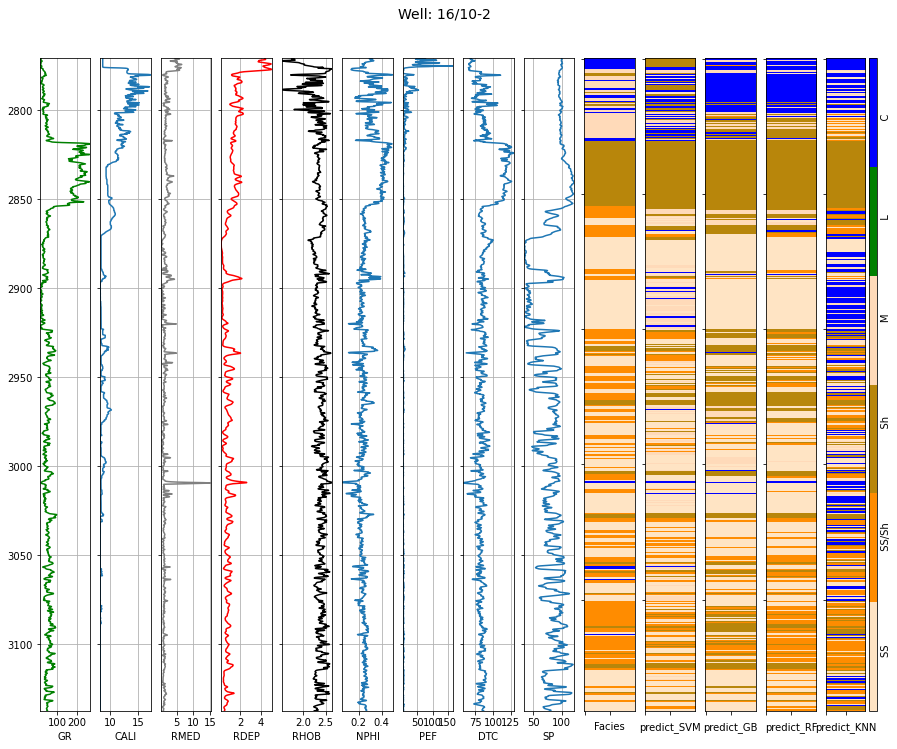

In [73]:
compare_facies_plot(blind, 'predict_SVM', 'predict_GB', 'predict_RF', 'predict_KNN', facies_colors)